In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
import scipy.special as sp
import sklearn.datasets as datasets
import sklearn.linear_model as lm
import sklearn.ensemble as en
import sklearn.tree as tree
import econml

#### data generation packages
import strawman_edge
import strawman_center

#### main packages
import characterize

%load_ext jupyter_black

## Data Generation

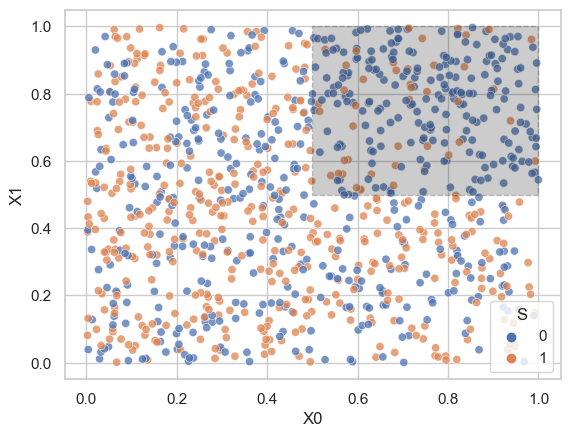

In [15]:
df, Y = strawman_edge.get_data(n=1000, seed=0)

sns.set(style="whitegrid")
fig, ax = plt.subplots()
sns.scatterplot(x="X0", y="X1", hue="S", data=df, alpha=0.75)
ax.add_patch(
    Rectangle((0.5, 0.5), 0.5, 0.5, color="black", ls="--", alpha=0.2, fill=True)
)

# Characterize Under-represented Population
1. Estimate CATE $\tau(x)$ and ATE $\tau$ for experimental sample
2. Estimate proclivity-score $P(S=1 \mid X=x)$ using both experimental and observational sample
3. Calculate heterogeneity-score $h(x) = (\tau(x) - \tau)^2$, and representation-score $r(x) = log P(S=1 \mid X=x) - log P(S=0 \mid X=x)$
4. Combine them using predefined weights $\alpha$ to calculate objective value $z(x) = \alpha_0 r(x) - \alpha_1 h(x)$
5. Fit regularized decision-tree to tasselate the space into (non-overlapping) hyper-boxes -- $z \sim x$
    1. For regulatization, one can use minimum number of nodes in a leaf and/or maximum tree depth
6. Find the hyper-box(es) with the minimum average objective value

In [16]:
m, result, tau = characterize.characterize(df, alpha=[5, 1])

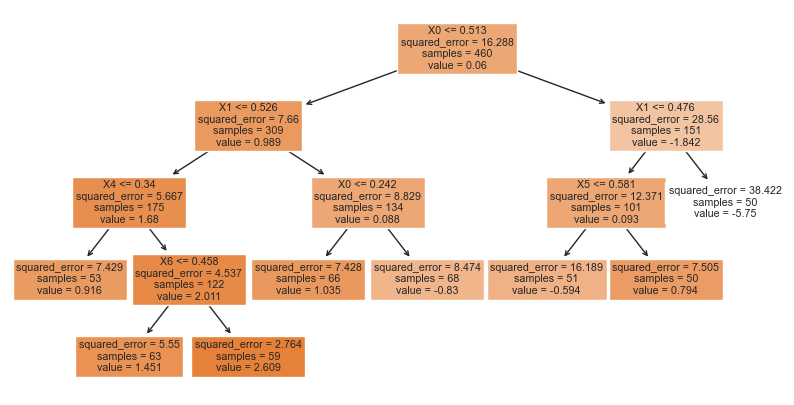

In [17]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_tree = tree.plot_tree(
    m,
    filled=True,
    ax=ax,
    feature_names=df.loc[df["S"] == 1].drop(columns=["Yobs", "T", "S"]).columns,
)